In [1]:
import tweepy
import configparser
import geocoder
import os
import json
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#set-up and authentication
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [3]:
available_loc = api.available_trends()

with open("available_locs_for_trend.json","w") as wp:
    wp.write(json.dumps(available_loc, indent=1))
loc = 'India'
g = geocoder.osm(loc)

closest_loc = api.closest_trends(g.lat, g.lng)
trends = api.get_place_trends(closest_loc[0]['woeid'])
with open("twitter_{}_trend.json".format(loc),"w") as wp:
    wp.write(json.dumps(trends, indent=1))

In [4]:
with open('twitter_India_trend.json','r') as f:
    data=json.load(f)

In [5]:
df=pd.DataFrame().from_records(data[0]['trends'])

In [6]:
df.drop(columns=['url','promoted_content','query'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)

In [8]:
df.set_index('name',inplace=True)

In [12]:
df.head()

,tweet_volume
name,
Sushant Born To Rule Hearts,32124.0
#TheGrayMan,55778.0
#JaganShouldApologizeJrNTR,16103.0
LAAL SINGH TRAILER WEEK,12410.0
2seok,16589.0


<AxesSubplot:ylabel='name'>

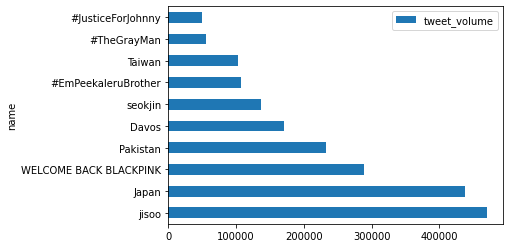

In [13]:
df.sort_values(by='tweet_volume',ascending=False).head(10).plot(kind='barh')